In [2]:
#Dependencies
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import scipy.stats as stats
import math
import seaborn as sns; sns.set(color_codes=True)
import requests
from census import Census
from us import states

In [3]:
#Read in the csv file for solar panel dataset 
file_path1="clean_state_purchases_FINAL.csv"
df=pd.read_csv(file_path1)
df.tail()

,date,draw_sales,jackpot,pp_sales,state_abbr,state_draw_sales,state_pp_sales,date_format,ticket_sales,revenue,year
36134,3/6/10,37513118.0,144.0,6303025.0,VA,722125.0,166211.0,2010-03-06,722125.0,888336.0,2010
36135,3/6/10,37513118.0,144.0,6303025.0,VI,29840.0,18816.0,2010-03-06,29840.0,48656.0,2010
36136,3/6/10,37513118.0,144.0,6303025.0,VT,78778.0,25085.0,2010-03-06,78778.0,103863.0,2010
36137,3/6/10,37513118.0,144.0,6303025.0,WA,414727.0,38536.0,2010-03-06,414727.0,453263.0,2010
36138,3/6/10,37513118.0,144.0,6303025.0,WI,845169.0,81542.0,2010-03-06,845169.0,926711.0,2010


In [4]:
df.columns

Index(['date', 'draw_sales', 'jackpot', 'pp_sales', 'state_abbr',
       'state_draw_sales', 'state_pp_sales', 'date_format', 'ticket_sales',
       'revenue', 'year'],
      dtype='object')

In [5]:
df['state_abbr'].value_counts()

RI    809
VI    809
VA    809
OK    809
MO    809
PA    809
DC    809
MN    809
AZ    809
CO    809
IA    809
GA    809
KS    809
AR    809
IN    809
MT    809
ID    809
IL    809
ME    809
WI    809
SD    809
NM    809
MI    809
OR    809
DE    809
KY    809
MA    809
NC    809
NY    809
NH    809
ND    809
SC    809
NE    809
WA    809
FL    809
VT    809
MD    809
LA    809
NJ    809
TX    809
CT    804
TN    804
OH    797
CA    486
PR    332
WV    278
WY    278
Name: state_abbr, dtype: int64

In [6]:
df[df['state_abbr']=='CA']

,date,draw_sales,jackpot,pp_sales,state_abbr,state_draw_sales,state_pp_sales,date_format,ticket_sales,revenue,year
2,12/02/17,33842134.0,177.0,3144938.0,CA,3292686.0,0.0,2017-12-02,1646343.0,3292686.0,2017
47,11/29/17,29306014.0,163.0,2662866.0,CA,3024832.0,0.0,2017-11-29,1512416.0,3024832.0,2017
92,11/25/17,28442720.0,149.0,2721992.0,CA,2792580.0,0.0,2017-11-25,1396290.0,2792580.0,2017
137,11/22/17,29925352.0,134.0,2767370.0,CA,3068934.0,0.0,2017-11-22,1534467.0,3068934.0,2017
182,11/18/17,29509730.0,119.0,2807194.0,CA,2885328.0,0.0,2017-11-18,1442664.0,2885328.0,2017
229,11/15/17,26385356.0,103.0,2502567.0,CA,2793120.0,0.0,2017-11-15,1396560.0,2793120.0,2017
276,11/11/17,26639324.0,90.0,2627599.0,CA,2540426.0,0.0,2017-11-11,1270213.0,2540426.0,2017
323,11/08/17,23435234.0,75.0,2337920.0,CA,2310408.0,0.0,2017-11-08,1155204.0,2310408.0,2017
370,11/04/17,25735618.0,64.0,2584601.0,CA,2327594.0,0.0,2017-11-04,1163797.0,2327594.0,2017
417,11/01/17,22186600.0,52.0,2255609.0,CA,2161464.0,0.0,2017-11-01,1080732.0,2161464.0,2017


In [7]:
df.count()

date                36139
draw_sales          36139
jackpot             36139
pp_sales            36139
state_abbr          36139
state_draw_sales    36139
state_pp_sales      36139
date_format         36139
ticket_sales        36139
revenue             36139
year                36139
dtype: int64

In [8]:
pd.notnull(df['ticket_sales']).value_counts()

True    36139
Name: ticket_sales, dtype: int64

In [9]:
pd.notnull(df['revenue']).value_counts()

True    36139
Name: revenue, dtype: int64

In [10]:
#df=df.dropna()
#df

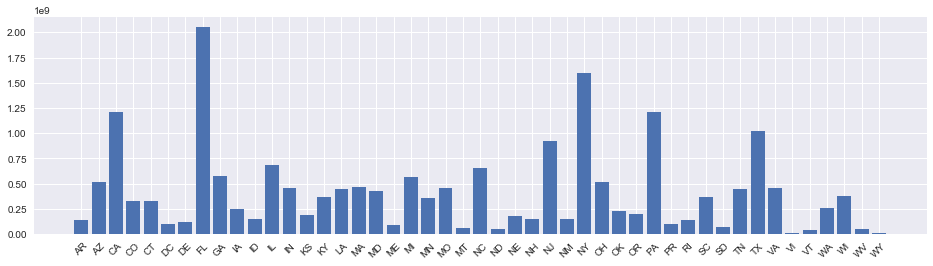

In [11]:
#Ticket_sales vs state
state_ticket_sales=df.groupby('state_abbr')['ticket_sales'].sum()
#print(pd.DataFrame(state_counts))
plt.figure(figsize=(16,4))
plt.bar(range(len(state_ticket_sales)),state_ticket_sales)
plt.xticks(range(len(state_ticket_sales)), state_ticket_sales.index, rotation=45)
plt.show()

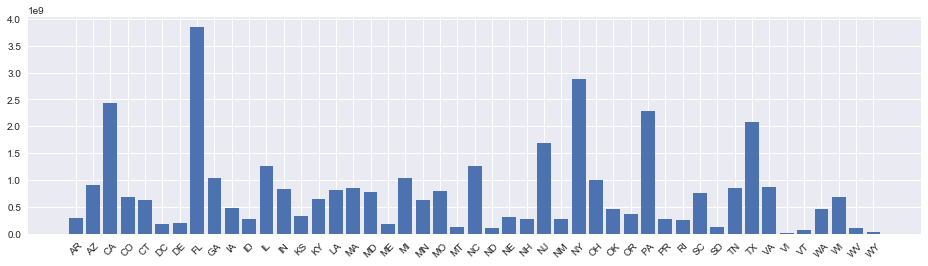

In [12]:
#Ticket_sales vs state
state_revenue=df.groupby('state_abbr')['revenue'].sum()
#print(pd.DataFrame(state_counts))
plt.figure(figsize=(16,4))
plt.bar(range(len(state_revenue)),state_revenue)
plt.xticks(range(len(state_revenue)), state_revenue.index, rotation=45)
plt.show()

      ticket_sales  percent change
year                              
2010  2.316911e+09       69.892778
2011  2.949955e+09       88.989409
2012  2.396729e+09       72.300595
2013  2.712290e+09       81.819920
2014  1.732847e+09       52.273675
2015  1.923085e+09       58.012468
2016  3.314951e+09      100.000000
2017  2.183058e+09       65.854925


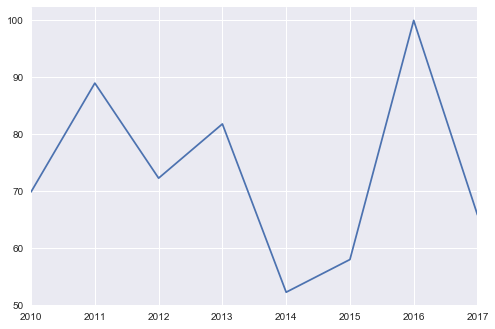

In [13]:
#National total ticket sales change over the years
change_over_years=df.groupby('year')['ticket_sales'].sum()
change_over_years=pd.DataFrame(change_over_years)
change_over_years['percent change']=change_over_years['ticket_sales']/max(change_over_years['ticket_sales'].values)*100
print(change_over_years)
plt.plot(change_over_years.index, change_over_years['percent change'])
plt.xlim(2010,2017)
plt.show()

      ticket_sales  percent change
year                              
2010   273881477.0       73.613776
2011   372051932.0      100.000000
2012   288239459.0       77.472910
2013   291144072.0       78.253611
2014   167325160.0       44.973603
2015   177246703.0       47.640312
2016   292470281.0       78.610069
2017   191289693.0       51.414783


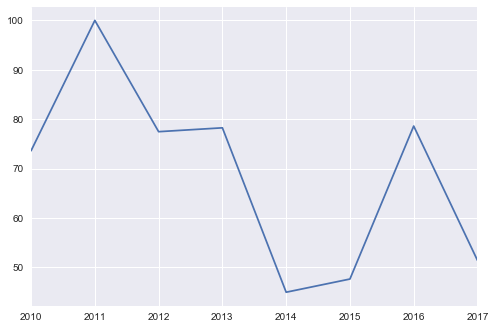

In [14]:
#Florida ticket sales change over the years
df_fl=df[df['state_abbr']=="FL"]
change_over_years=df_fl.groupby('year')['ticket_sales'].sum()
change_over_years=pd.DataFrame(change_over_years)
change_over_years['percent change']=change_over_years['ticket_sales']/max(change_over_years['ticket_sales'].values)*100
print(change_over_years)
plt.plot(change_over_years.index, change_over_years['percent change'])
plt.xlim(2010,2017)
plt.show()

      ticket_sales  percent change
year                              
2010   154854245.0       59.340616
2011   259955775.0       99.615842
2012   229087096.0       87.786870
2013   242975518.0       93.108956
2014   136099200.0       52.153626
2015   146435260.0       56.114436
2016   260958268.0      100.000000
2017   170567040.0       65.361807


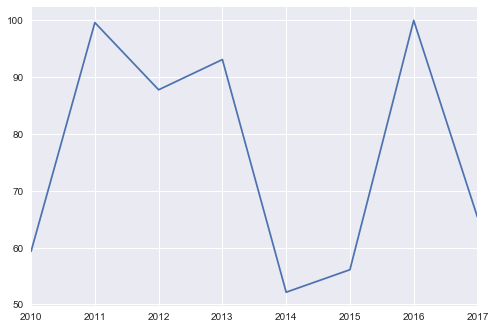

In [ ]:
#NY state ticket sales change over the years
df_ny=df[df['state_abbr']=="NY"]
change_over_years=df_ny.groupby('year')['ticket_sales'].sum()
change_over_years=pd.DataFrame(change_over_years)
change_over_years['percent change']=change_over_years['ticket_sales']/max(change_over_years['ticket_sales'].values)*100
print(change_over_years)
plt.plot(change_over_years.index, change_over_years['percent change'])
plt.xlim(2010,2017)
plt.show()

In [ ]:
%matplotlib inline
#Scatterplot for ticket sales vs date by state
plt.figure(figsize=(12,8))
#plt.scatter(pop_zip.astype(int),ins_counts_zip, label="2015 by zipcode")
#plt.scatter(df['date'], df['ticket_sales'])
ax=sns.stripplot(x="date", y="ticket_sales", data=df)
#plt.xlim(0,2.6e7)
plt.xlabel('date', fontsize=20)
plt.xticks(fontsize=18)
plt.ylabel('ticket_sales', fontsize=20)
plt.yticks(fontsize=18)
plt.title('Ticket sales vs Date by State', fontsize=24)
#plt.legend()
plt.show()

In [ ]:
%matplotlib inline
#Scatterplot for ticket sales vs state
plt.figure(figsize=(12,8))
ax=sns.stripplot(x="state_abbr", y="ticket_sales", data=df)
#plt.xlim(0,2.6e7)
plt.xlabel('state', fontsize=18)
plt.xticks(fontsize=12, rotation=45)
plt.ylabel('ticket_sales', fontsize=20)
plt.yticks(fontsize=18)
plt.title('Ticket sales vs State', fontsize=24)
#plt.legend()
plt.show()

## Merge census data 2010 with census data 2011-2015

In [ ]:
#Read in the csv file for solar panel dataset 
df1=pd.read_csv("census_2010.csv")
df1['year']=2010
df1['Unemployment Rate']='NA'
df1['Unemployment Count']='NA'
df1.head()

In [ ]:
df2=pd.read_csv("census_data2011_2015.csv")
df2.head()

In [ ]:
df_census=df1.append(df2)
df_census.head()

In [ ]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
#df_census.to_csv("census2010_2015.csv", encoding="utf-8", index=False)

In [ ]:
df_pb=df.rename(index=str, columns={"state_abbr": "state"})

In [ ]:
merged_df=pd.merge(df_pb, df_census, how='left', on=['state', 'year'])
merged_df.head()

In [ ]:
df_2010_2015=merged_df[merged_df['year']!=2017]
df_2010_2015=df_2010_2015[df_2010_2015['year']!=2016]
df_2010_2015.head()

In [ ]:
#clean_df_pop=clean_df.drop(['Unemployment Rate'], axis = 1, inplace = True)
df_2015=df_2010_2015[df_2010_2015['year']==2015]
df_2015=df_2015.dropna()
df_2015.head()

## Ticket sales normalized by population - 2015

In [ ]:
#plot state vs normalized counts
norm_counts=df_2015.groupby(['state'])['ticket_sales'].sum()/df_2015.groupby(['state'])['Population'].mean().sort_values(ascending=False)
plt.figure(figsize=(16,6))
plt.bar(range(len(norm_counts)),norm_counts, label="2015")
#plt.xticks(x, labels, rotation='vertical')
plt.xticks(range(len(norm_counts)), norm_counts.index, fontsize=12, rotation=45)
#plt.xlabel('State', fontsize=20)
#plt.xticks(fontsize=14)
plt.ylabel('ticket_sales', fontsize=20)
plt.yticks(fontsize=18)
plt.title('State vs Normalized Ticket Sales (2015)', fontsize=24)
#plt.legend()
plt.show()

In [ ]:
df_2015['Unemployment Count']=df_2015['Unemployment Count'].astype(float)
df_2015['Unemployment Rate']=df_2015['Unemployment Rate'].astype(float)
correlation=df_2015.corr()
correlation[['ticket_sales', 'revenue']].drop(['draw_sales', 'jackpot', 'pp_sales',
       'state_draw_sales', 'state_pp_sales', 'year'])

In [ ]:
df_2015['norm_ticket_sales']=df_2015['ticket_sales']/df_2015['Population']
correlation=df_2015.corr()
correlation
#correlation[['ticket_sales', 'revenue', 'norm_ticket_sales']].drop(['draw_sales', 'jackpot', 'pp_sales',
       #'state_draw_sales', 'state_pp_sales', 'year'])

correlation.drop(['draw_sales','pp_sales','state_draw_sales', 'state_pp_sales', 'year'])

## Ticket sales vs jackpot

In [ ]:
df_jack=df_2010_2015.groupby("date")['jackpot'].mean()
df_ticket_sales=df_2010_2015.groupby("date")['ticket_sales'].sum()
#Plot population vs ticket sales by state
plt.figure(figsize=(12,8))
#plt.scatter(pop_zip.astype(int),ins_counts_zip, label="2015 by zipcode")
ax = sns.regplot(x=df_jack, y=df_ticket_sales)
#ax=sns.stripplot(x="date", y="ticket_sales", data=df)
#plt.xlim(0,2.6e7)
plt.xlabel('Jackpot', fontsize=20)
plt.xticks(fontsize=18)
plt.ylabel('Ticket sales', fontsize=20)
plt.yticks(fontsize=18)
plt.title('Jackpot vs ticket sales by state', fontsize=24)
#plt.legend()
plt.show()